In [1]:
import torch
import dill
import os.path as op
import numpy as np
import hnn_core
from hnn_core import simulate_dipole, Network, read_params, JoblibBackend
import matplotlib as mpl
import matplotlib.pyplot as plt
import sbi.utils as utils
from sbi.inference.base import infer
import multiprocessing
import datetime
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from scipy import interpolate


In [2]:
posterior_file = open('../../data/ERP/12152020_165639/posterior_ERPYes_t10000_12152020_165639', 'rb')
posterior = dill.load(posterior_file)
posterior_file.close()

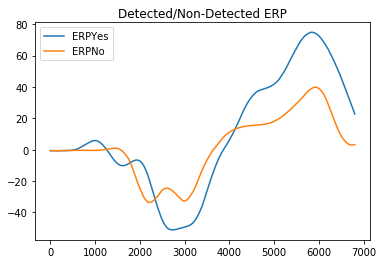

In [10]:
ERPYes_dpl = np.loadtxt('../../data/ERP/ERPYes_dpl.txt', delimiter=',')
ERPNo_dpl = np.loadtxt('../../data/ERP/ERPNo_dpl.txt', delimiter=',')

plt.figure()
plt.plot(ERPYes_dpl)
plt.plot(ERPNo_dpl)
plt.legend(['ERPYes','ERPNo'])
plt.title('Detected/Non-Detected ERP')
plt.savefig('ERP_dipole.png')



In [4]:
prior_dict = {'gbar_L2Pyr_L2Pyr_ampa':(0, 0.01),
'gbar_L2Pyr_L2Pyr_nmda':(0, 0.01), 
'gbar_L2Basket_L2Pyr_gabaa':(0, 0.1),
'gbar_L2Basket_L2Pyr_gabab':(0, 0.1),
'gbar_L2Pyr_L5Pyr':(0, 0.01),
'gbar_L2Basket_L5Pyr':(0, 0.1),
'gbar_L5Pyr_L5Pyr_ampa':(0, 0.01),
'gbar_L5Pyr_L5Pyr_nmda':(0, 0.01),
'gbar_L5Basket_L5Pyr_gabaa':(0, 0.1),
'gbar_L5Basket_L5Pyr_gabab':(0, 0.1),
'gbar_L2Pyr_L2Basket':(0, 0.01),
'gbar_L2Basket_L2Basket':(0, 0.1),
'gbar_L2Pyr_L5Basket':(0, 0.01),
'gbar_L5Pyr_L5Basket':(0, 0.01),
'gbar_L5Basket_L5Basket':(0, 0.1)}

param_low = [float(item[0]) for key, item in prior_dict.items()]
param_high = [float(item[1]) for key, item in prior_dict.items()]
limits = [[param_low[idx], param_high[idx]] for idx in range(len(param_low))]
condition = [np.mean([param_low[idx], param_high[idx]]) for idx in range(len(limits))]
param_names = ['L2P_L2P_ampa',
'L2P_L2P_nmda', 
'L2B_L2P_gabaa',
'L2B_L2P_gabab',
'L2P_L5P',
'L2B_L5P',
'L5P_L5P_ampa',
'L5P_L5P_nmda',
'L5B_L5P_gabaa',
'L5B_L5P_gabab',
'L2P_L2B',
'L2B_L2B',
'L2P_L5B',
'L5P_L5B',
'L5B_L5B']



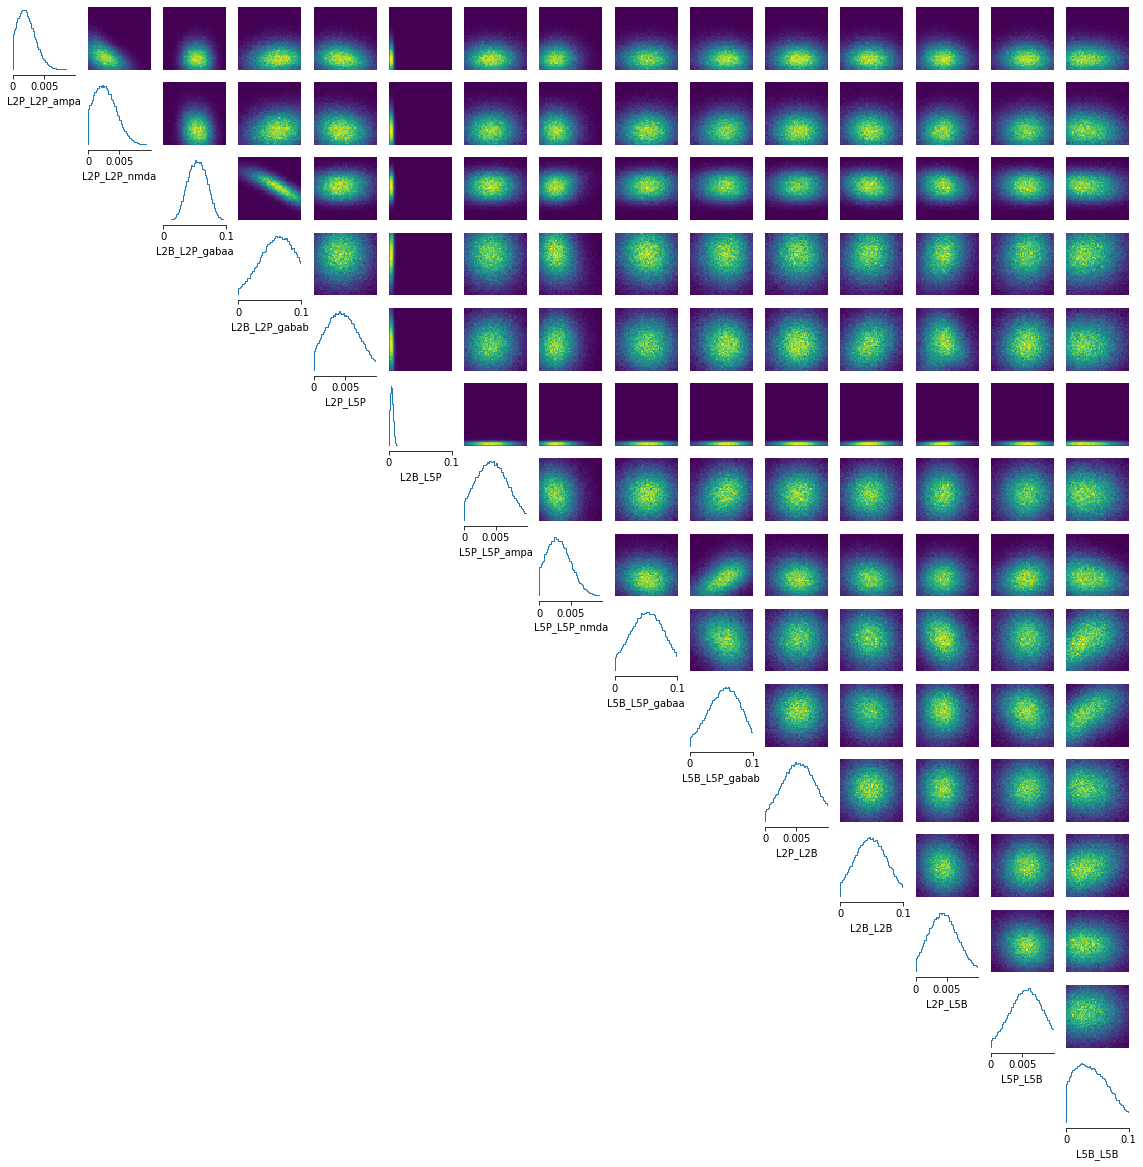

In [5]:
samples = posterior.sample((100000,), x=ERPYes_dpl)
# log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names, limits=limits)
plt.savefig('ERPYes_marginal.png')

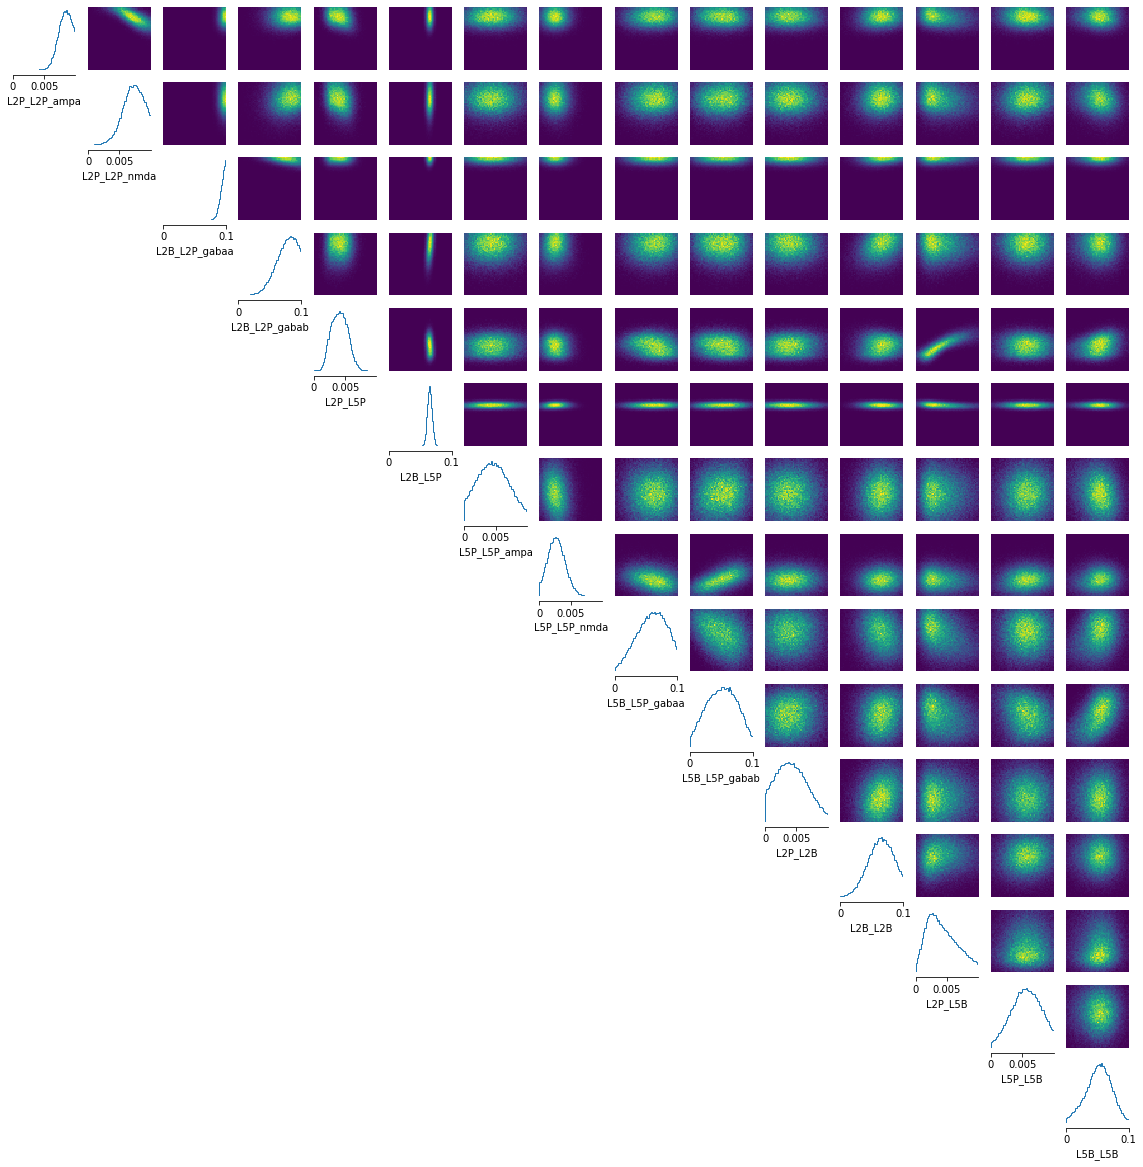

In [6]:
samples = posterior.sample((100000,), x=ERPNo_dpl)
#log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names, limits=limits)
plt.savefig('ERPNo_marginal.png')

In [7]:
condition = posterior.sample((1,), x=ERPYes_dpl)

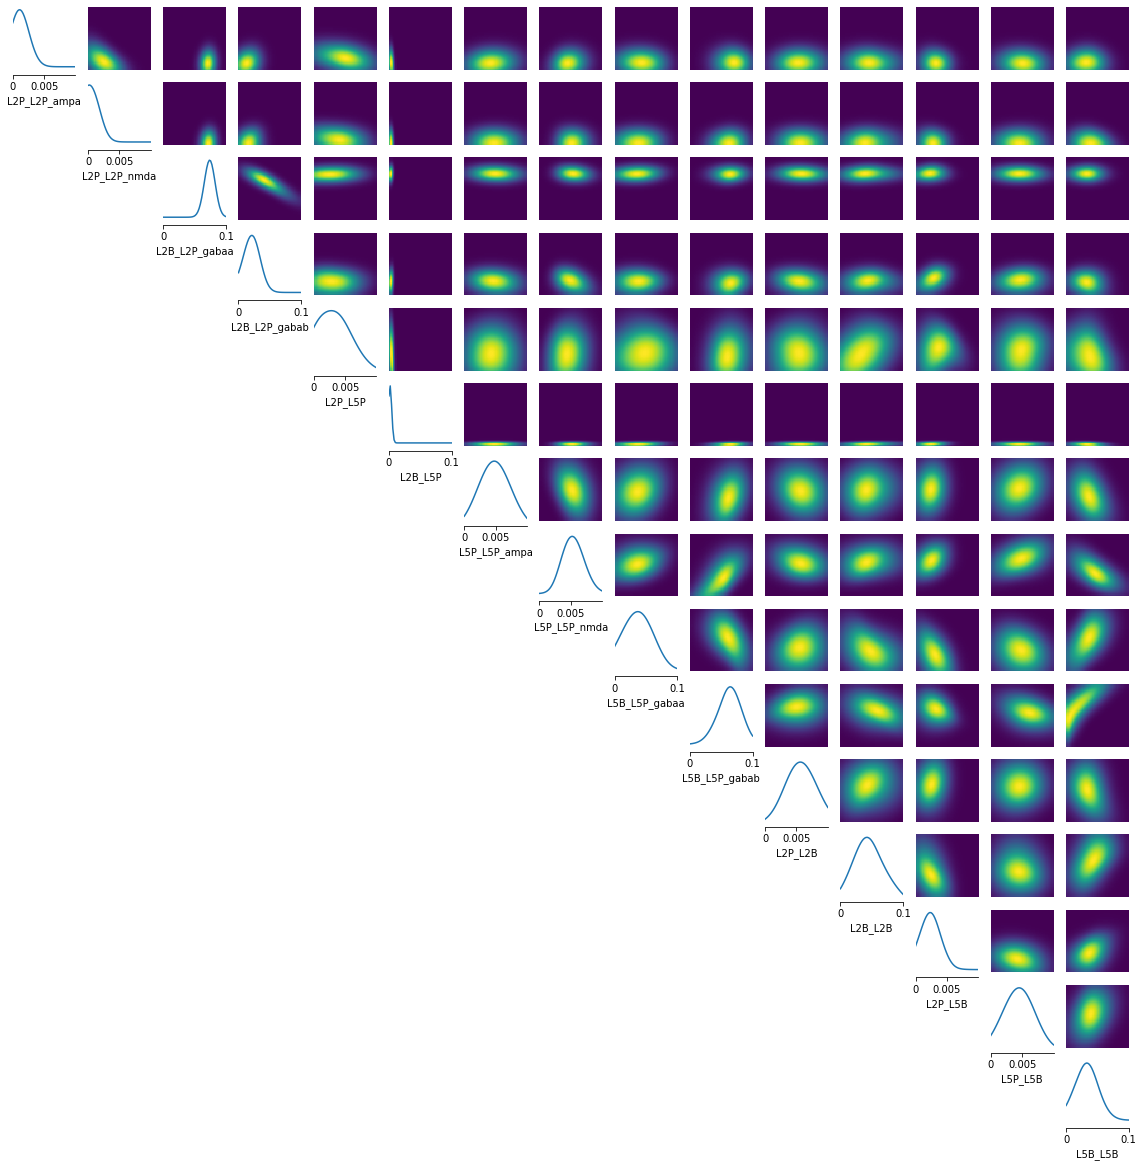

In [8]:
posterior.set_default_x(ERPYes_dpl)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)
plt.savefig('ERPYes_conditional.png')

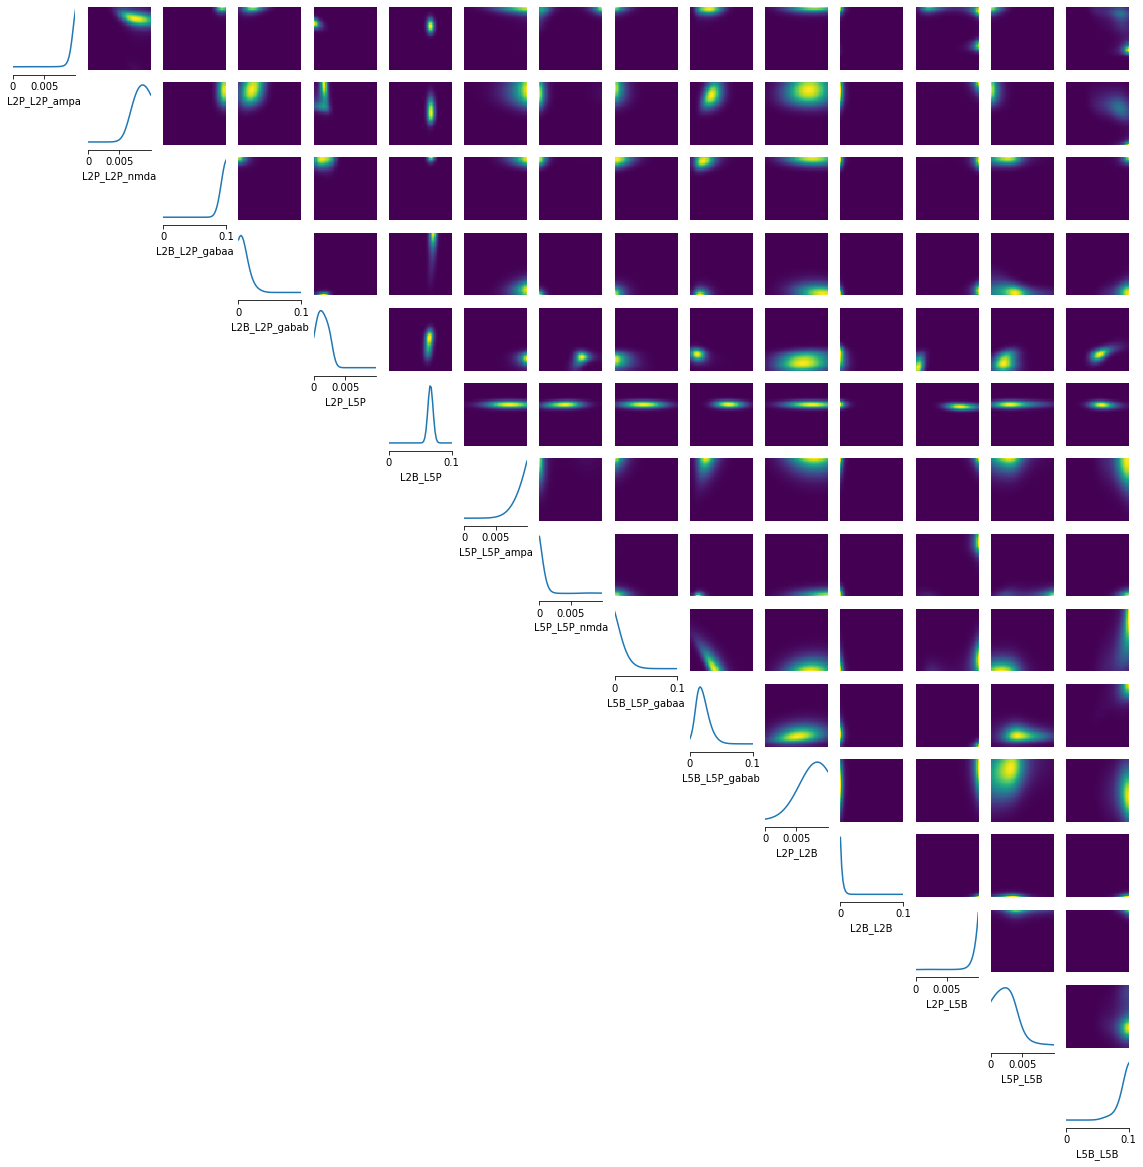

In [9]:
posterior.set_default_x(ERPNo_dpl)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)
plt.savefig('ERPNo_conditional.png')